In [2]:
# Install the required libraries
!pip install prophet

In [3]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

c:\Users\bmsto\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [10]:
home_ownership_rate = pd.read_csv("Home Ownership Rate (Hamilton, OH) - Home Ownership Rate.csv")
us_census = pd.read_csv("US Census (Hamilton, OH) - Sheet1.csv")
home_value_forecast = pd.read_csv("Home Value Forecast - Sheet1.csv")
metro_sales_count = pd.read_csv("Metro Sales Count - Sheet1.csv")
new_construction_sales = pd.read_csv("New Construction Sales - Sheet1.csv")
zestimate = pd.read_csv("Zillow Housing Estimate Index - Sheet1.csv")

In [ ]:
display(home_ownership_rate)
display(us_census)
display(home_value_forecast)
display(metro_sales_count)
display(new_construction_sales)
display(zestimate)


In [15]:
us_census

Fact,"Population estimates, July 1, 2023, (V2023)","Population Estimates, July 1, 2022, (V2022)","Population estimates base, April 1, 2020, (V2023)","Population estimates base, April 1, 2020, (V2022)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2022, (V2022)","Population, Census, April 1, 2020","Population, Census, April 1, 2010","Persons under 5 years, percent","Persons under 18 years, percent",...,Value Flags,-,F,D,N,FN,X,S,NaN,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Either no or too few sample observations were ...,Fewer than 25 firms,Suppressed to avoid disclosure of confidential...,Data for this geographic area cannot be displa...,Footnote on this item in place of data,Not applicable,Suppressed; does not meet publication standards,Not available,Value greater than zero but less than half uni...
"Hamilton County, Ohio",NaN,"825,037",NaN,"830,625",NaN,-0.70%,"830,639","802,374",6.10%,22.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Value Note for Hamilton County, Ohio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
zestimate.dropna(inplace=True)

In [20]:
zestimate.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


In [19]:
zestimate.describe

<bound method NDFrame.describe of     RegionID  SizeRank                  RegionName RegionType StateName  \
0     394466        28              Cincinnati, OH        msa        OH   
1     394492        32                Columbus, OH        msa        OH   
2     394475        35               Cleveland, OH        msa        OH   
3     394304        83                   Akron, OH        msa        OH   
4     395160        93                  Toledo, OH        msa        OH   
5     395245       106              Youngstown, OH        msa        OH   
6     394439       137                  Canton, OH        msa        OH   
8     395221       309                Wheeling, WV        msa        OH   
9     395117       316             Springfield, OH        msa        OH   
14    394340       404               Ashtabula, OH        msa        OH   
16    395248       426              Zanesville, OH        msa        OH   
17    394465       460             Chillicothe, OH        msa     

In [21]:
zestimate.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '1/31/2000', '2/29/2000', '3/31/2000', '4/30/2000', '5/31/2000',
       ...
       '2/28/2023', '3/31/2023', '4/30/2023', '5/31/2023', '6/30/2023',
       '7/31/2023', '8/31/2023', '9/30/2023', '10/31/2023', '11/30/2023'],
      dtype='object', length=292)

In [25]:
import pandas as pd

# Assuming 'zestimate' is your DataFrame
# Replace 'zestimate' with your actual DataFrame
zestimate = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])



                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\bmsto\AppData\Local\Temp\ipykernel_5296\1874466390.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


# Plotting each city

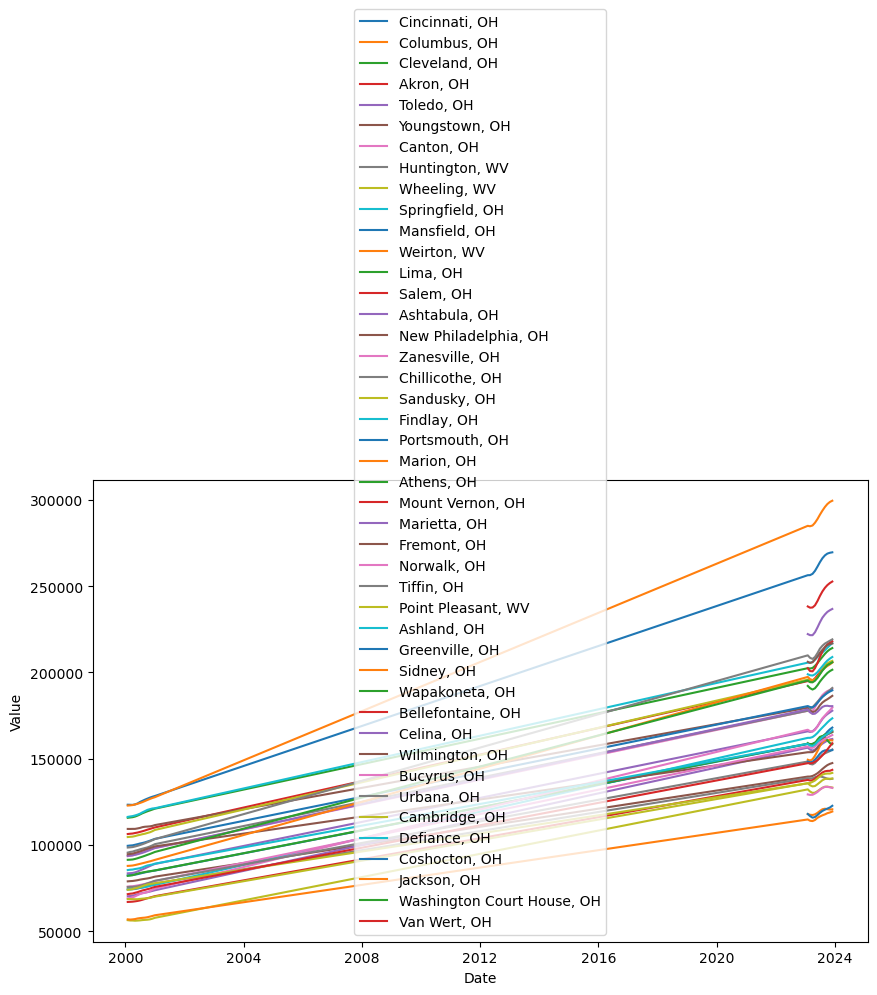

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'zestimate' with your actual DataFrame
zestimate = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2000 and 2023
cols_2000 = [col for col in zestimate.columns if '2000' in col]
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2000 + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Melt the DataFrame to make it suitable for plotting
df_melted = df_filtered.melt(id_vars='RegionName', var_name='Date', value_name='Value')

# Convert the 'Date' column to datetime format
df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Plot the data
plt.figure(figsize=(10, 6))
for region in df_melted['RegionName'].unique():
    data = df_melted[df_melted['RegionName'] == region]
    plt.plot(data['Date'], data['Value'], label=region)

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [26]:
import pandas as pd

# Assuming 'zestimate' is your DataFrame
# Replace 'zestimate' with your actual DataFrame
zestimate_mean = pd.read_csv('./Zillow Housing Estimate Index - Sheet1.csv')  # replace 'your_file.csv' with your actual file

# Filter columns from 2023
cols_2023 = [col for col in zestimate.columns if '2023' in col]
cols = ['RegionName'] + cols_2023

# Create a new DataFrame with only the filtered columns
df_filtered = zestimate[cols]

# Calculate the mean for each city in 2023
df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)

# Print the mean values
print(df_filtered[['RegionName', 'Mean_2023']])


                    RegionName      Mean_2023
0               Cincinnati, OH  263305.138409
1                 Columbus, OH  291657.197700
2                Cleveland, OH  207579.830264
3                    Akron, OH  200133.371536
4                   Toledo, OH  171100.921282
5               Youngstown, OH  143095.933345
6                   Canton, OH  184023.719445
7               Huntington, WV  138880.634355
8                 Wheeling, WV  132205.102573
9              Springfield, OH  166914.659091
10               Mansfield, OH  161986.275973
11                 Weirton, WV  119279.330036
12                    Lima, OH  161689.499136
13                   Salem, OH  140488.626800
14               Ashtabula, OH  157913.766209
15        New Philadelphia, OH  181300.551155
16              Zanesville, OH  171604.079818
17             Chillicothe, OH  184326.868127
18                Sandusky, OH  200260.119964
19                 Findlay, OH  210528.674400
20              Portsmouth, OH  11

C:\Users\bmsto\AppData\Local\Temp\ipykernel_5296\3845421007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Mean_2023'] = df_filtered[cols_2023].mean(axis=1)


In [ ]:
# Create a new DataFrame with the region names and their mean values
mean_df = df_filtered[['RegionName', 'Mean_2023']].copy()

# Now 'mean_df' is your new DataFrame with the mean values for each city in 2023
mean_df


In [33]:
mean_df

,RegionName,Mean_2023
0,"Cincinnati, OH",263305.138409
1,"Columbus, OH",291657.197700
2,"Cleveland, OH",207579.830264
3,"Akron, OH",200133.371536
4,"Toledo, OH",171100.921282


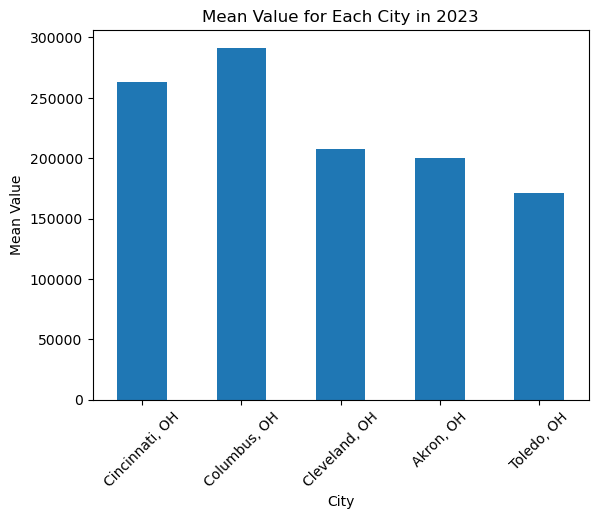

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming mean_df is your DataFrame
mean_df = pd.DataFrame({
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282]
})

mean_df.plot(kind='bar', x='RegionName', y='Mean_2023', legend=False)
plt.xlabel('City')
plt.ylabel('Mean Value')
plt.title('Mean Value for Each City in 2023')
plt.xticks(rotation=45)
plt.show()


# df of the mean zestimate for each city

In [37]:
zestimate

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,...,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023
0,394466,28,"Cincinnati, OH",msa,OH,123285.59080,123248.6175,123190.11390,123465.08810,123998.75980,...,256429.8895,257186.0028,258907.0016,261391.1562,263944.2553,266223.3256,267886.2660,268921.0643,269405.3712,269668.9344
1,394492,32,"Columbus, OH",msa,OH,122802.19670,122909.1501,123081.82620,123429.69540,123850.70580,...,284776.9682,285236.2615,286804.2594,288978.0312,291477.0123,293844.5102,295975.9036,297656.6676,298865.4308,299588.3884
2,394475,35,"Cleveland, OH",msa,OH,115713.93960,115883.6149,116056.98890,116418.73980,116976.62730,...,202291.0216,202583.4009,203810.8053,205405.5919,207243.7700,209038.5210,210793.6855,212232.2111,213380.3142,214136.1425
3,394304,83,"Akron, OH",msa,OH,106289.14790,106456.4836,106577.02750,106875.41180,107149.62400,...,194782.3361,195229.4814,196585.1946,198324.0854,200149.8978,201907.0226,203367.1560,204596.9838,205441.5261,206093.6075
4,395160,93,"Toledo, OH",msa,OH,83501.85695,83582.9768,83699.29069,84039.18756,84556.47498,...,165502.3824,165836.6763,167074.6010,168790.1211,170897.0878,173017.8861,174626.7266,175847.7469,176854.7346,177813.3466


# Plotting housing zestimates in 2000 vs 2023 for each city in Ohio

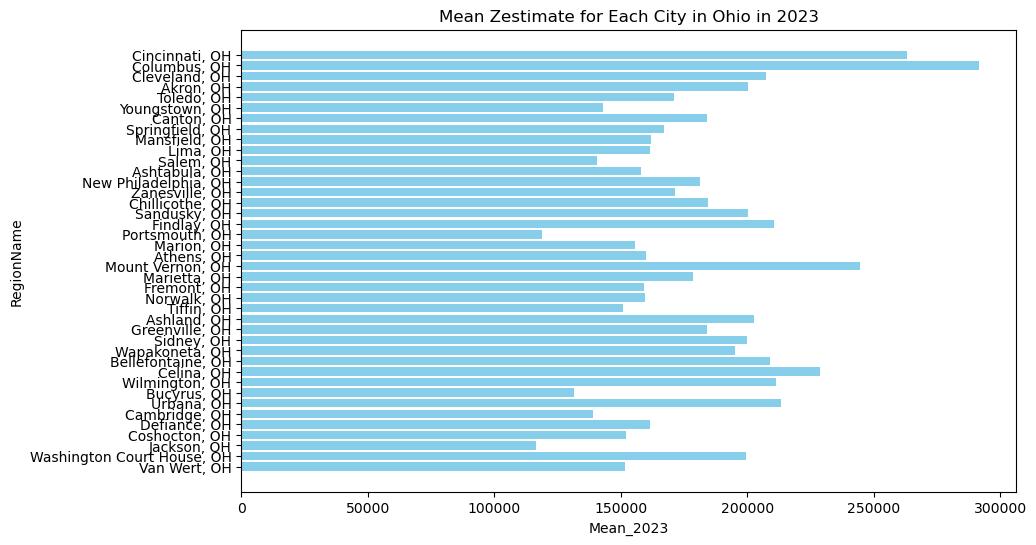

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'RegionName': ['Cincinnati, OH', 'Columbus, OH', 'Cleveland, OH', 'Akron, OH', 'Toledo, OH', 'Youngstown, OH', 'Canton, OH', 'Huntington, WV', 'Wheeling, WV', 'Springfield, OH', 'Mansfield, OH', 'Weirton, WV', 'Lima, OH', 'Salem, OH', 'Ashtabula, OH', 'New Philadelphia, OH', 'Zanesville, OH', 'Chillicothe, OH', 'Sandusky, OH', 'Findlay, OH', 'Portsmouth, OH', 'Marion, OH', 'Athens, OH', 'Mount Vernon, OH', 'Marietta, OH', 'Fremont, OH', 'Norwalk, OH', 'Tiffin, OH', 'Point Pleasant, WV', 'Ashland, OH', 'Greenville, OH', 'Sidney, OH', 'Wapakoneta, OH', 'Bellefontaine, OH', 'Celina, OH', 'Wilmington, OH', 'Bucyrus, OH', 'Urbana, OH', 'Cambridge, OH', 'Defiance, OH', 'Coshocton, OH', 'Jackson, OH', 'Washington Court House, OH', 'Van Wert, OH'],
    'Mean_2023': [263305.138409, 291657.197700, 207579.830264, 200133.371536, 171100.921282, 143095.933345, 184023.719445, 138880.634355, 132205.102573, 166914.659091, 161986.275973, 119279.330036, 161689.499136, 140488.626800, 157913.766209, 181300.551155, 171604.079818, 184326.868127, 200260.119964, 210528.674400, 118903.271273, 155798.867227, 160043.236936, 244497.605464, 178670.099791, 159093.650200, 159567.207145, 150751.749782, 136432.576118, 202678.053736, 184258.144655, 200018.978464, 195268.056327, 209025.609945, 228853.665545, 211180.788164, 131497.549764, 213414.454718, 139114.623236, 161362.076936, 151923.137945, 116407.309609, 199466.818136, 151535.763018]
}

# Create DataFrame
mean_df = pd.DataFrame(data)

# Filter DataFrame to only include cities in Ohio
mean_df = mean_df[mean_df['RegionName'].str.contains(', OH')]

# Plot
plt.figure(figsize=(10,6))
plt.barh(mean_df['RegionName'], mean_df['Mean_2023'], color='skyblue')
plt.xlabel('Mean_2023')
plt.ylabel('RegionName')
plt.title('Mean Zestimate for Each City in Ohio in 2023')
plt.gca().invert_yaxis()
plt.show()


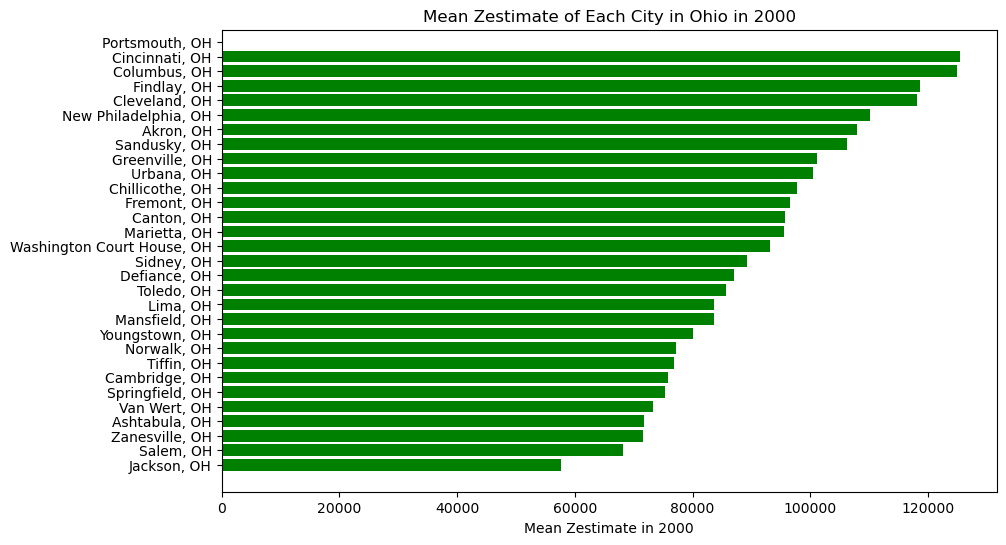

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'zestimate' is your DataFrame
df_2000 = zestimate.loc[:, zestimate.columns.str.contains('2000')]  # Filter columns for the year 2000

# Calculate mean Zestimate for each city in 2000
mean_zestimate_2000 = df_2000.mean(axis=1)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'RegionName': zestimate['RegionName'],
    'MeanZestimate2000': mean_zestimate_2000
})

# Filter DataFrame to only include cities in Ohio
plot_df = plot_df[plot_df['RegionName'].str.contains(', OH')]

# Sort values for better visualization
plot_df = plot_df.sort_values('MeanZestimate2000')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(plot_df['RegionName'], plot_df['MeanZestimate2000'], color='green')
plt.xlabel('Mean Zestimate in 2000')
plt.title('Mean Zestimate of Each City in Ohio in 2000')
plt.show()

